# **MACD (Moving Average Convergence Divergence):**

   - *__Purpose__*: MACD is a trend-following momentum indicator that helps identify changes in the strength, direction, momentum, and duration of a trend.
   - *__Activation and Usage__*: Use the `talib.MACD` function in Python. It generates three values - MACD line, signal line, and histogram.
   - *__Strategy__*: MACD crossovers, where the MACD line crosses the signal line, can signal potential trend changes. Positive histogram values indicate bullish momentum, and negative values indicate bearish momentum.
   - *__Key Points__*: Pay attention to the convergence and divergence of MACD and price trends for potential reversals.
   - *__Effective Conditions__*: MACD is effective in trending markets, helping traders ride and identify shifts in trends.

In [1]:
import talib
from backtesting.test import GOOG
from backtesting import Backtest , Strategy
from backtesting.lib import crossover
import matplotlib.pyplot as plt
import pandas as pd
print(talib.MACD.__doc__)

c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),


 MACD(real[, fastperiod=?, slowperiod=?, signalperiod=?])

    Moving Average Convergence/Divergence (Momentum Indicators)

    Inputs:
        real: (any ndarray)
    Parameters:
        fastperiod: 12
        slowperiod: 26
        signalperiod: 9
    Outputs:
        macd
        macdsignal
        macdhist
    


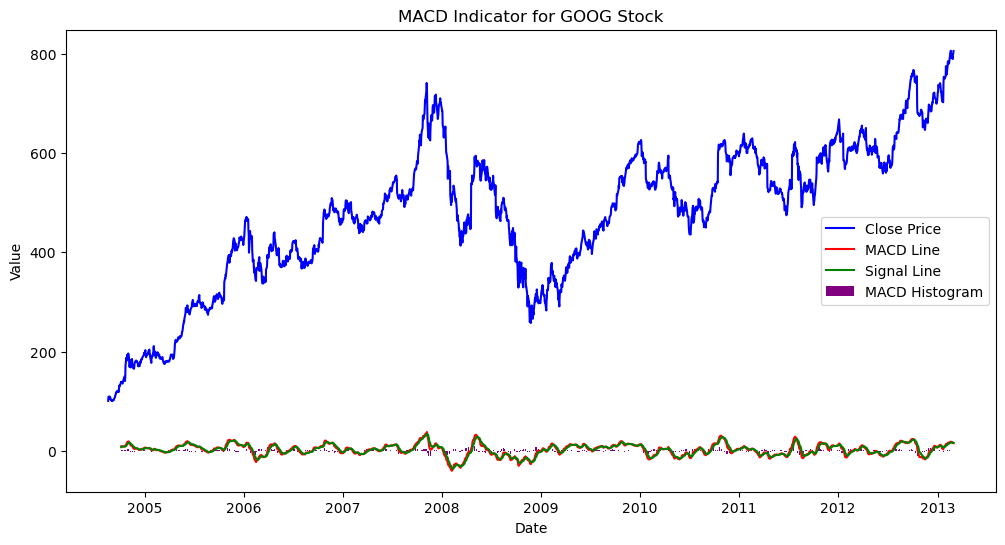

In [2]:
fastperiod = 12
slowperiod = 26
signalperiod = 9

# Calculate the MACD, MACD Signal, and MACD Histogram
macd, macdsignal, macdhist = talib.MACD(GOOG['Close'], fastperiod=fastperiod, slowperiod=slowperiod, signalperiod=signalperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Close prices
plt.plot(GOOG.index, GOOG['Close'], label='Close Price', color='blue')

# Plot the MACD line
plt.plot(GOOG.index, macd, label='MACD Line', color='red')

# Plot the MACD Signal line
plt.plot(GOOG.index, macdsignal, label='Signal Line', color='green')

# Plot the MACD Histogram
plt.bar(GOOG.index, macdhist, label='MACD Histogram', color='purple')

# Add legend
plt.legend()

# Add title and labels
plt.title('MACD Indicator for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()

In [3]:
def optim_func(series):
    if series['# Trades'] < 15:
        return -1
    
    return  series['Equity Final [$]'] * 0.2 + series['Profit Factor'] *  series['Win Rate [%]'] 


class MacdOscillator(Strategy):
    signalperiod = 9
    fastperiod = 12
    slowperiod = 26
    
    def init(self):
        self.macd, self.macdsignal, self.macdhist = self.I(talib.MACD, self.data.Close, self.fastperiod, self.slowperiod, self.signalperiod)

    def next(self):
        if crossover(self.macd, self.macdsignal) and self.macdhist > 0:
            if not self.position:
                self.buy(sl=0.95*self.data.Close, tp=self.data.Close*1.05)
        elif self.position and crossover(self.macdsignal, self.macd):
            self.position.close()
        
bt = Backtest(GOOG, MacdOscillator, cash=10_000)
stats = bt.optimize(
    signalperiod = range(2, 16, 3),
    fastperiod =  range(7, 21, 3),
    slowperiod = range(14, 30, 3),
    constraint= lambda param: param.fastperiod < param.slowperiod,
    maximize= optim_func
)
# stats = bt.optimize(
#     upper_bound = range(50, 90, 5),
#     lower_bound =  range(10, 45, 5),
#     rsi_windows= range(10, 30, 2), 
#     maximize='Sharpe Ratio')
print(stats)
bt.plot()


Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   36.964618
Equity Final [$]                   43361.5775
Equity Peak [$]                    43839.4775
Return [%]                         333.615775
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   18.780232
Volatility (Ann.) [%]               18.985507
Sharpe Ratio                         0.989188
Sortino Ratio                         1.96486
Calmar Ratio                          0.72273
Max. Drawdown [%]                  -25.985127
Avg. Drawdown [%]                   -3.165706
Max. Drawdown Duration      502 days 00:00:00
Avg. Drawdown Duration       41 days 00:00:00
# Trades                                  165
Win Rate [%]                        50.909091
Best Trade [%]                      11.551986
Worst Trade [%]                     -8.019973
Avg. Trade [%]                    

c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


GridPlot(id='p1735', ...)